In [137]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [138]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [139]:
data.shape

(8124, 23)

In [140]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# EDA

## Poisonous vs Edible 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2c0e6fbb470&gt;

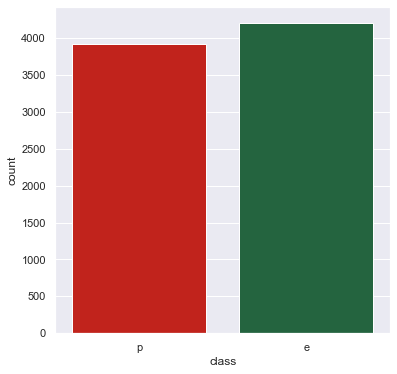

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x="class", palette=["#DC0A00","#196F3D"])

## Cap Shape 
bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2c0e7b07f28&gt;

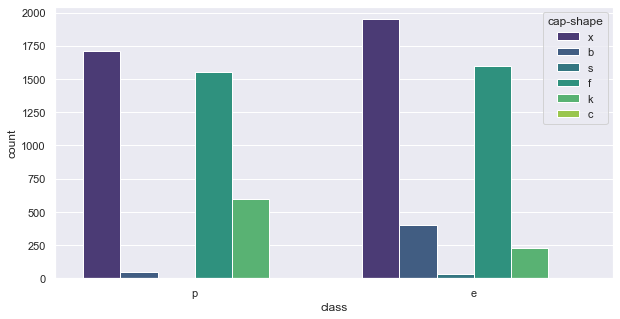

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="class", palette="viridis",hue="cap-shape")

## Cap Color
brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2c0e7b21dd8&gt;

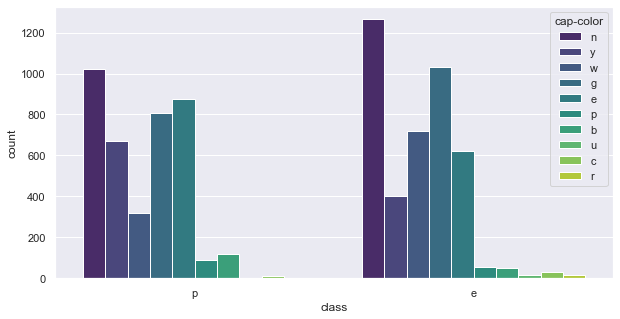

In [143]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="class", palette="viridis", hue="cap-color")

## Habitat
grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2c0e7b4ff98&gt;

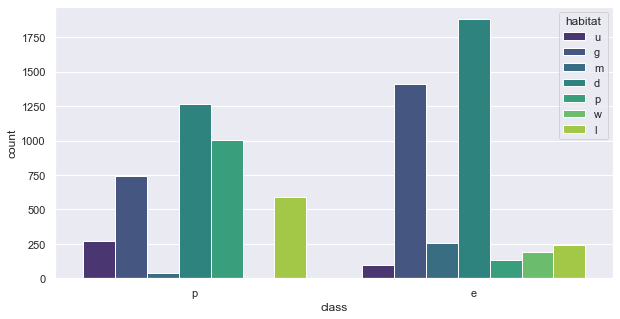

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="class", palette="viridis", hue="habitat")

Percentages of being poisonuos for each habitat

In [145]:
data.groupby("habitat")["class"].value_counts(normalize=True)[:,"p"]*100

habitat
d    40.279543
g    34.450652
l    71.153846
m    12.328767
p    88.111888
u    73.913043
Name: class, dtype: float64

# Preprocessing

In [146]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All of the data are categorical, so we will make label encoding

In [147]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in data.columns:
    data[i] = labelencoder.fit_transform(data[i])

In [148]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [149]:
X = data.drop("class",axis=1)
y = data["class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
- Logistic Regression
- K-Nearest Neighbors
- Random Forest Classification


In [150]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class=&#39;auto&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=None, solver=&#39;lbfgs&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
lr.score(X_test,y_test)

0.9499589827727646

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm=&#39;auto&#39;, leaf_size=30, metric=&#39;minkowski&#39;,
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights=&#39;uniform&#39;)

In [153]:
knn.score(X_test,y_test)

0.9954881050041017

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=&#39;gini&#39;, max_depth=None, max_features=&#39;auto&#39;,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [155]:
rfc.score(X_test,y_test)

1.0

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2c0e885b550&gt;

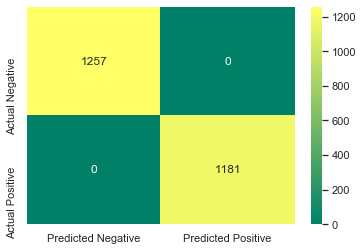

In [158]:
from sklearn.metrics import confusion_matrix
pred = rfc.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"])
sns.heatmap(cm,annot=True, cmap='summer', fmt="d")

# Tree Visualization

[Text(592.875, 1041.9, &#39;ring-number &lt;= 3.5\ngini = 0.499\nsamples = 3602\nvalue = [2934, 2752]\nclass = edible&#39;),
 Text(279.0, 951.3000000000001, &#39;stalk-shape &lt;= 2.5\ngini = 0.387\nsamples = 1898\nvalue = [786, 2209]\nclass = poisonous&#39;),
 Text(209.25, 860.7, &#39;veil-color &lt;= 1.5\ngini = 0.162\nsamples = 1551\nvalue = [216, 2209]\nclass = poisonous&#39;),
 Text(139.5, 770.1, &#39;stalk-surface-above-ring &lt;= 0.5\ngini = 0.06\nsamples = 1459\nvalue = [71, 2209]\nclass = poisonous&#39;),
 Text(69.75, 679.5, &#39;gini = 0.0\nsamples = 35\nvalue = [55, 0]\nclass = edible&#39;),
 Text(209.25, 679.5, &#39;ring-type &lt;= 4.0\ngini = 0.014\nsamples = 1424\nvalue = [16, 2209]\nclass = poisonous&#39;),
 Text(139.5, 588.9, &#39;gini = 0.0\nsamples = 584\nvalue = [0, 900]\nclass = poisonous&#39;),
 Text(279.0, 588.9, &#39;stalk-root &lt;= 0.5\ngini = 0.024\nsamples = 840\nvalue = [16, 1309]\nclass = poisonous&#39;),
 Text(209.25, 498.29999999999995, &#39;gini = 0.0\ns

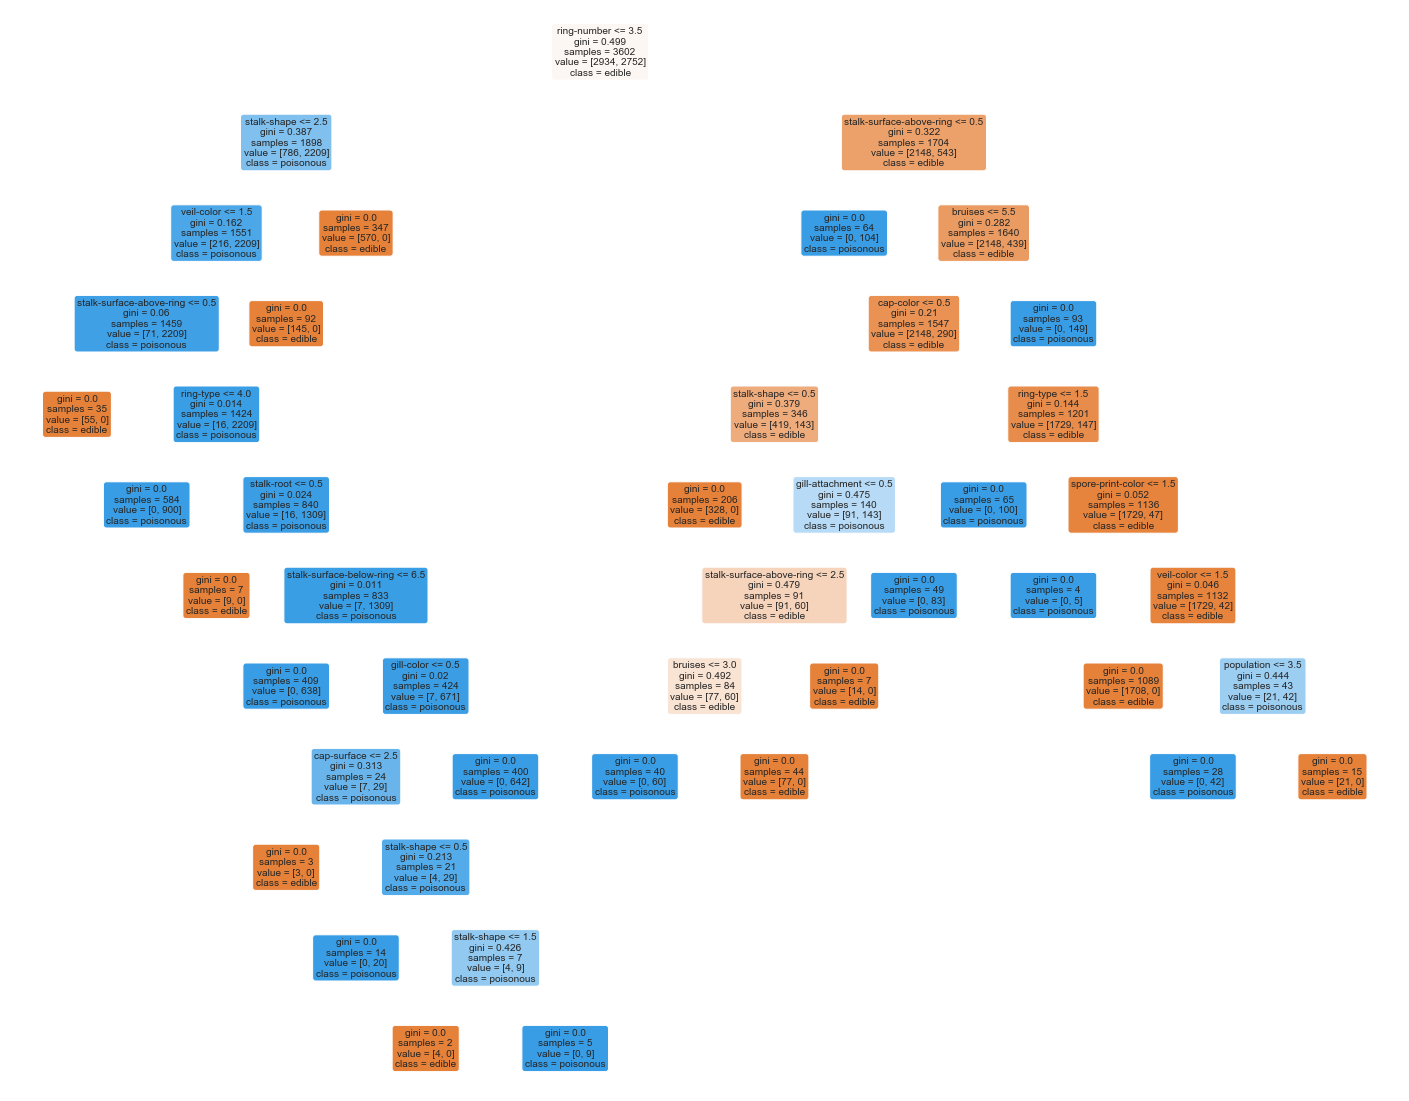

In [157]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rfc.estimators_[7],
               feature_names = data.columns,
               class_names = ["edible", "poisonous"],
               filled = True,
               rounded=True,
               fontsize=10)